In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
file_name = "training.csv"

In [3]:
df = pd.read_csv(file_name, index_col='RefId')
#df.head(5)

In [4]:
df.shape

(72983, 33)

In [5]:
# Lets see the data structure
df.info()
# This will give you an indication of how many rows and columns are present in the dataset
# alongwith their data types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72983 entries, 1 to 73014
Data columns (total 33 columns):
IsBadBuy                             72983 non-null int64
PurchDate                            72983 non-null object
Auction                              72983 non-null object
VehYear                              72983 non-null int64
VehicleAge                           72983 non-null int64
Make                                 72983 non-null object
Model                                72983 non-null object
Trim                                 70623 non-null object
SubModel                             72975 non-null object
Color                                72975 non-null object
Transmission                         72974 non-null object
WheelTypeID                          69814 non-null float64
WheelType                            69809 non-null object
VehOdo                               72983 non-null int64
Nationality                          72978 non-null object
Size     

In [6]:
# We will find out how many NULL values are present 
df.isnull().sum()

IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  2360
SubModel                                 8
Color                                    8
Transmission                             9
WheelTypeID                           3169
WheelType                             3174
VehOdo                                   0
Nationality                              5
Size                                     5
TopThreeAmericanName                     5
MMRAcquisitionAuctionAveragePrice       18
MMRAcquisitionAuctionCleanPrice         18
MMRAcquisitionRetailAveragePrice        18
MMRAcquisitonRetailCleanPrice           18
MMRCurrentAuctionAveragePrice          315
MMRCurrentAuctionCleanPrice            315
MMRCurrentR

In [7]:
print(" The original shape of the df was:", df.shape)

# Dropping COLOUMN that has less than 20 Values, as it is not going to alter/skew  the data set (20 Vs ~72K) 
df = df.dropna(subset=['SubModel','Color','Transmission','Nationality','Size','TopThreeAmericanName',
                       'MMRAcquisitionAuctionCleanPrice','MMRAcquisitionRetailAveragePrice',
                       'MMRAcquisitonRetailCleanPrice'])

# Dropping COLOUMN that has less than 300 Values(300 Vs ~72K) 
df = df.dropna(subset=['MMRCurrentAuctionAveragePrice','MMRCurrentAuctionCleanPrice',
                       'MMRCurrentRetailAveragePrice','MMRCurrentRetailCleanPrice'])

# Field "PRIMEUNIT" & "AUCGUART" has only 3419 entry, rest all NULL values, It is as good as not haveing  
# therse fields So we can drop these two coloumns
df = df.drop(['PRIMEUNIT','AUCGUART'], axis = 1)

#For this week we are going to delete all the Rows
#that contains null value
df = df.dropna(subset=['Trim','WheelTypeID','WheelType'])

# VehYear and VehicleAge are the same, hence removing the VehYear Col 
# WheelTypeID and WheelType are the same, hence removing WheelType Col     
df = df.drop(['VehYear','WheelType'], axis = 1)

print(" Shape of df now is: ", df.shape)

 The original shape of the df was: (72983, 33)
 Shape of df now is:  (67270, 29)


In [8]:
# No of Unique Values for each Coloum
for column in df.columns:
    print(column, len(df[column].unique()))

IsBadBuy 2
PurchDate 516
Auction 3
VehicleAge 10
Make 32
Model 957
Trim 133
SubModel 826
Color 16
Transmission 3
WheelTypeID 3
VehOdo 38083
Nationality 4
Size 12
TopThreeAmericanName 4
MMRAcquisitionAuctionAveragePrice 10198
MMRAcquisitionAuctionCleanPrice 11214
MMRAcquisitionRetailAveragePrice 12530
MMRAcquisitonRetailCleanPrice 13253
MMRCurrentAuctionAveragePrice 10176
MMRCurrentAuctionCleanPrice 11072
MMRCurrentRetailAveragePrice 12255
MMRCurrentRetailCleanPrice 12947
BYRNO 72
VNZIP1 151
VNST 37
VehBCost 2033
IsOnlineSale 2
WarrantyCost 280


In [9]:
# This step is needed if you want to convert all categorical columns to ordinal encoded numbers
# Filter the above object columns based on the object data type

object_columns = df.select_dtypes(include=['object']).columns
print(df[object_columns].head(), "\n\n")

# This method of Label Encoding assumes that we are using Tree-based models later.

from sklearn.preprocessing import LabelEncoder

# Iterate through the object columns and convert them one by one into a numerical column
for column in object_columns:
    # Instantiate a labelencoder object and then do the fit transform on the data
    labelencoder = LabelEncoder()
    df[column] = labelencoder.fit_transform(df[column])
    
print(df.head())

       PurchDate Auction   Make                Model Trim           SubModel  \
RefId                                                                          
1      12/7/2009   ADESA  MAZDA               MAZDA3    i         4D SEDAN I   
2      12/7/2009   ADESA  DODGE  1500 RAM PICKUP 2WD   ST  QUAD CAB 4.7L SLT   
3      12/7/2009   ADESA  DODGE           STRATUS V6  SXT   4D SEDAN SXT FFV   
4      12/7/2009   ADESA  DODGE                 NEON  SXT           4D SEDAN   
5      12/7/2009   ADESA   FORD                FOCUS  ZX3       2D COUPE ZX3   

        Color Transmission  Nationality         Size TopThreeAmericanName VNST  
RefId                                                                           
1         RED         AUTO  OTHER ASIAN       MEDIUM                OTHER   FL  
2       WHITE         AUTO     AMERICAN  LARGE TRUCK             CHRYSLER   FL  
3      MAROON         AUTO     AMERICAN       MEDIUM             CHRYSLER   FL  
4      SILVER         AUTO     AME

In [10]:
df.shape

(67270, 29)

In [11]:
# Figure out the class distribution percentage and round it to 3 decimal places

print('Percentage of negative class is {} %'.format(
    round(df['IsBadBuy'].value_counts()[0]/len(df) * 100,3)))

print('Percentage of Positive class is {} %'.format(
    round(df['IsBadBuy'].value_counts()[1]/len(df) * 100,3)))

# Watch out for situations where the percentage of one class is really small compared to the other
# In such a scenario we would need to use SMOTE or other balancing techniques

Percentage of negative class is 90.437 %
Percentage of Positive class is 9.563 %


In [12]:
X = df.drop('IsBadBuy', axis=1)
y = df['IsBadBuy']

# split into train and test set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Note optionally convert the pandas dataframe into a numpy array using to_numpy if you have a big data
# and want to model faster. Otherwise it doesnt matter which data structure you use
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(53816, 28) (53816,)
(13454, 28) (13454,)


In [13]:
from sklearn.ensemble import RandomForestClassifier

# Initialize a classifier object with default params
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Make predictions using both train and test set
rf_train_pred = classifier.predict(X_train)
rf_test_pred = classifier.predict(X_test)

training_score = classifier.score(X_train, y_train)
test_score = classifier.score(X_test, y_test)

print("Has a training accuracy of {} % ".format(round(training_score.mean(), 5) * 100))
print("Has a test accuracy of {} % ".format(round(test_score.mean(), 5) * 100))
# The accuracy score on its own is less useful for classification. Need to check the confusion matrix
# Notice how severe the overfitting is

Has a training accuracy of 98.396 % 
Has a test accuracy of 90.018 % 


In [14]:
from sklearn.metrics import classification_report
print("classification_report\n", classification_report(y_train, rf_train_pred), "\n")

print("classification_report\n", classification_report(y_test, rf_test_pred), "\n")
# As can be seen in the report below, the F1 score can be improved

classification_report
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     48697
           1       1.00      0.83      0.91      5119

    accuracy                           0.98     53816
   macro avg       0.99      0.92      0.95     53816
weighted avg       0.98      0.98      0.98     53816
 

classification_report
               precision    recall  f1-score   support

           0       0.90      1.00      0.95     12140
           1       0.32      0.02      0.04      1314

    accuracy                           0.90     13454
   macro avg       0.61      0.51      0.49     13454
weighted avg       0.85      0.90      0.86     13454
 



In [15]:
import itertools
# This is from sklearn's example page 
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[12086    54]
 [ 1289    25]]


Of the 13454 items in the Test set,
The model correctly predicts 25 true positives while missing out on 1289 false negatives
It also picks up 54 false positives


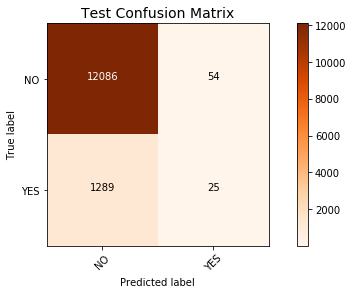

In [16]:
labels = ['NO', 'YES']
from sklearn.metrics import confusion_matrix

# Call the function above for the....
# training data 
confusion_matrix_train_object = confusion_matrix(y_train, rf_train_pred)

# and
# test data
confusion_matrix_test_object = confusion_matrix(y_test, rf_test_pred)


fig = plt.figure(figsize=(8,4))
plot_confusion_matrix(confusion_matrix_test_object, labels, title="Test Confusion Matrix", 
                      cmap=plt.cm.Oranges)

print('\n')
tn, fp, fn, tp = confusion_matrix_test_object.ravel()
print('Of the {} items in the Test set,'.format(len(y_test)))
print('The model correctly predicts {} true positives while missing out on {} false negatives'.format(
tp, fn))

print('It also picks up {} false positives'.format(fp))

# FP of  of  is pretty bad. 
# FN of  of  is also pretty bad. 

In [17]:
from sklearn.metrics import roc_auc_score
print("Test:", roc_auc_score(y_test, rf_test_pred))
print("Train:", roc_auc_score(y_train, rf_train_pred))

Test: 0.5072888848768428
Train: 0.9158810081242678
